In [350]:
import pandas as pd

trainset = pd.read_csv("avila-tr.txt",delimiter=',')
trainset.to_csv('avila-tr.csv')
testset = pd.read_csv("avila-ts.txt",delimiter=',')
testset.to_csv('avila-ts.csv')

In [316]:
trainset

0.266074  -0.16562   0.32098  0.483299   0.17234  0.273364  0.371178  \
0      0.130292  0.870736 -3.210528  0.062493  0.261718  1.436060  1.465940   
1     -0.116585  0.069915  0.068476 -0.783147  0.261718  0.439463 -0.081827   
2      0.031541  0.297600 -3.210528 -0.583590 -0.721442 -0.307984  0.710932   
3      0.229043  0.807926 -0.052442  0.082634  0.261718  0.148790  0.635431   
4      0.117948 -0.220579 -3.210528 -1.623238  0.261718 -0.349509  0.257927   
...         ...       ...       ...       ...       ...       ...       ...   
10424  0.080916  0.588093  0.015130  0.002250  0.261718 -0.557133  0.371178   
10425  0.253730 -0.338346  0.352988 -1.154243  0.172340 -0.557133  0.257927   
10426  0.229043 -0.000745  0.171611 -0.002793  0.261718  0.688613  0.295677   
10427 -0.301743  0.352558  0.288973  1.638181  0.261718  0.688613  0.069175   
10428 -0.104241 -1.037102  0.388552 -1.099311  0.172340 -0.307984  0.786433   

       0.929823  0.251173  0.159345  A  
0      0.636203  0.282354  0.515587  A  
1     -0.888236 -0.123005  0.582939  A  
2      1.051693  0.594169 -0.533994  A  
3      0.051062  0.032902 -0.086652  F  
4     -0.385979 -0.247731 -0.331310  A  
...         ...       ...       ... ..  
10424  0.932346  0.282354 -0.580141  F  
10425  0.348428  0.032902 -0.527134  F  
10426 -1.088486 -0.590727  0.580142  A  
10427  0.502761  0.625350  0.718969  E  
10428 -1.337547  0.999528 -0.551063  X  

[10429 rows x 11 columns]

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [318]:
trainset = pd.read_csv('avila-tr.csv', names=['intercolumnar_distance','upper_margin','lower_margin',
                                        'exploitation','row_number','modular_ratio','interlinear_spacing',
                                        'weight','peak_number','modular_ratio/interlinear_spacing','label'])
testset = pd.read_csv('avila-ts.csv', names=['intercolumnar_distance','upper_margin','lower_margin',
                                        'exploitation','row_number','modular_ratio','interlinear_spacing',
                                        'weight','peak_number','modular_ratio/interlinear_spacing','label'])

trainset.to_csv('avila-tr.csv')
testset.to_csv('avila-ts.csv')

print(trainset.shape, testset.shape)
df = pd.concat([trainset, testset], axis=0, ignore_index=True, sort=False)

df.reset_index(inplace=True, drop=True)
df

(10430, 11) (10437, 11)


intercolumnar_distance  upper_margin  lower_margin  exploitation  \
0                    0.266074     -0.165620      0.320980      0.483299   
1                    0.130292      0.870736     -3.210528      0.062493   
2                   -0.116585      0.069915      0.068476     -0.783147   
3                    0.031541      0.297600     -3.210528     -0.583590   
4                    0.229043      0.807926     -0.052442      0.082634   
...                       ...           ...           ...           ...   
20862               -0.128929     -0.040001      0.057807      0.557894   
20863                0.266074      0.556689     -0.020434      0.176624   
20864               -0.054866      0.580242      0.032912     -0.016668   
20865                0.080916      0.588093      0.015130      0.002250   
20866                0.377169      0.014957      0.381439      0.292753   

       row_number  modular_ratio  interlinear_spacing    weight  peak_number  \
0        0.172340       0.273364             0.371178  0.929823     0.251173   
1        0.261718       1.436060             1.465940  0.636203     0.282354   
2        0.261718       0.439463            -0.081827 -0.888236    -0.123005   
3       -0.721442      -0.307984             0.710932  1.051693     0.594169   
4        0.261718       0.148790             0.635431  0.051062     0.032902   
...           ...            ...                  ...       ...          ...   
20862    0.261718      -0.930856            -0.044076  1.158458     2.277968   
20863    0.261718      -0.515608             0.597681  0.178349     0.625350   
20864    0.261718       1.519109             0.371178 -0.985508    -0.403638   
20865    0.261718      -0.930856            -0.270579  0.163807    -0.091823   
20866    0.261718      -1.470679            -0.006326 -0.494919    -0.247731   

       modular_ratio/interlinear_spacing label  
0                               0.159345     A  
1                               0.515587     A  
2                               0.582939     A  
3                              -0.533994     A  
4                              -0.086652     F  
...                                  ...   ...  
20862                          -0.699884     X  
20863                          -0.657245     G  
20864                           1.276301     A  
20865                          -0.593329     F  
20866                          -1.212974     H  

[20867 rows x 11 columns]

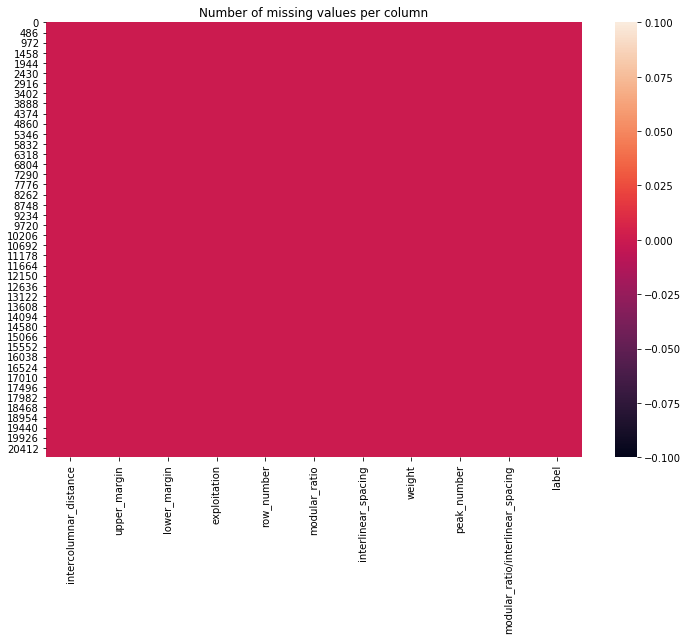

In [319]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isna(), cbar=True)
plt.title('Number of missing values per column')
plt.show()

In [320]:
df.isna().sum()

intercolumnar_distance               0
upper_margin                         0
lower_margin                         0
exploitation                         0
row_number                           0
modular_ratio                        0
interlinear_spacing                  0
weight                               0
peak_number                          0
modular_ratio/interlinear_spacing    0
label                                0
dtype: int64

In [321]:
df.max()

intercolumnar_distance               11.819916
upper_margin                             386.0
lower_margin                              50.0
exploitation                          3.987152
row_number                            1.066121
modular_ratio                             53.0
interlinear_spacing                       83.0
weight                               13.173081
peak_number                               44.0
modular_ratio/interlinear_spacing    11.911338
label                                        Y
dtype: object

In [322]:
df.min()

intercolumnar_distance               -3.498799
upper_margin                         -2.426761
lower_margin                         -3.210528
exploitation                         -5.440122
row_number                           -4.922215
modular_ratio                        -7.450257
interlinear_spacing                 -11.935457
weight                               -4.247781
peak_number                          -5.486218
modular_ratio/interlinear_spacing    -6.719324
label                                        A
dtype: object

In [323]:
df.shape

(20867, 11)

In [324]:
df.head()

intercolumnar_distance  upper_margin  lower_margin  exploitation  \
0                0.266074     -0.165620      0.320980      0.483299   
1                0.130292      0.870736     -3.210528      0.062493   
2               -0.116585      0.069915      0.068476     -0.783147   
3                0.031541      0.297600     -3.210528     -0.583590   
4                0.229043      0.807926     -0.052442      0.082634   

   row_number  modular_ratio  interlinear_spacing    weight  peak_number  \
0    0.172340       0.273364             0.371178  0.929823     0.251173   
1    0.261718       1.436060             1.465940  0.636203     0.282354   
2    0.261718       0.439463            -0.081827 -0.888236    -0.123005   
3   -0.721442      -0.307984             0.710932  1.051693     0.594169   
4    0.261718       0.148790             0.635431  0.051062     0.032902   

   modular_ratio/interlinear_spacing label  
0                           0.159345     A  
1                           0.515587     A  
2                           0.582939     A  
3                          -0.533994     A  
4                          -0.086652     F

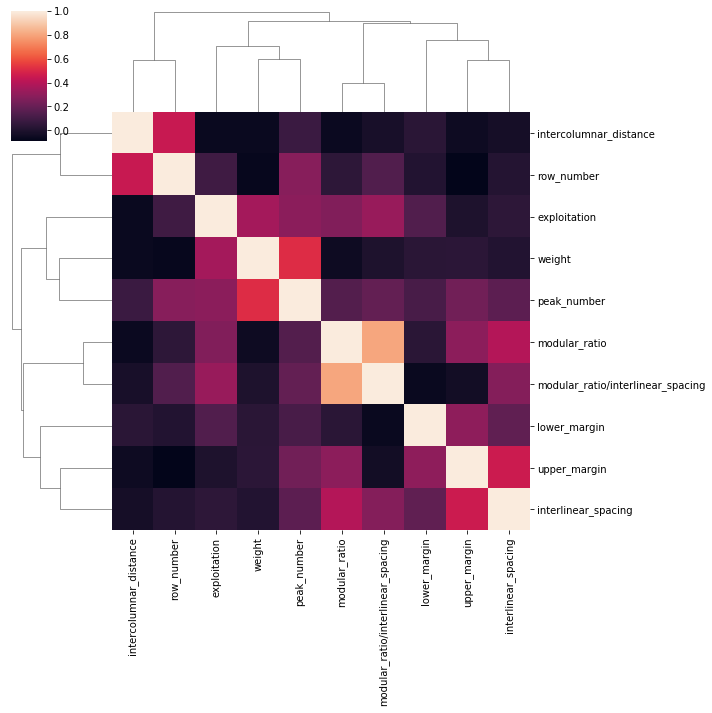

In [325]:
sns.clustermap(df.corr())

In [326]:
trainset = df[:trainset.shape[0]]
testset = df[trainset.shape[0]:]

In [327]:
trainset.shape

(10430, 11)

In [328]:
testset.shape

(10437, 11)

In [329]:
X_train = trainset.drop('label', axis=1)
y_train = trainset['label']
X_test = testset.drop('label', axis=1)
y_test = testset['label']

In [16]:
trainset['label'].value_counts().sort_index()

A    4286
B       5
C     103
D     352
E    1095
F    1961
G     446
H     519
I     831
W      44
X     522
Y     266
Name: label, dtype: int64

In [18]:
model = LinearSVC(random_state=0)
model

LinearSVC(random_state=0)

In [19]:
params = {
    'penalty' : ['l1', 'l2'],
    'loss' : ['hinge', 'squared_hinge'],
    'C' : [0.1, 1, 10],
    'dual': [True, False],
    'multi_class' : ['ovr', 'crammer_singer'],
    'tol' : [0.00001, 0.0001, 0.001]
}

In [20]:
grid = GridSearchCV(model, param_grid=params, cv = 5)
grid.fit(X_train, y_train)

/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_classes.py", line 238, in fit
    self.loss, sample_weight=sample_weight)
  File "/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 974, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 832, in _get_liblinear_solver_type
    % (error_string, penalty, loss, dual))
Va

/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: Convergence

KeyboardInterrupt: 

In [ ]:
grid.best_params_
#{'C': 0.1,
# 'dual': True,
# 'loss': 'hinge',
# 'multi_class': 'crammer_singer',
# 'penalty': 'l1',
# 'tol': 0.001}

In [ ]:
grid.best_score_

In [21]:
model = LinearSVC(C=0.1, dual=True, loss='hinge', multi_class='crammer_singer', penalty='l1', tol=0.001)
model

LinearSVC(C=0.1, loss='hinge', multi_class='crammer_singer', penalty='l1',
          tol=0.001)

In [22]:
model.fit(X_train, y_train)

/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=0.1, loss='hinge', multi_class='crammer_singer', penalty='l1',
          tol=0.001)

In [23]:
predictions = model.predict(X_test)
predictions[:20]

array(['A', 'X', 'I', 'A', 'A', 'A', 'Y', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'G', 'I', 'I'], dtype=object)

In [25]:
confusion_matrix(y_test, predictions)

array([[4068,    2,   24,    8,   27,   18,   52,   52,   20,    0,   12,
           3],
       [   0,    5,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [  67,    0,    2,    1,   11,    5,    4,   10,    2,    0,    0,
           1],
       [ 283,    0,    6,    0,    9,    6,    7,   35,    4,    0,    3,
           0],
       [ 651,    0,   30,   10,   84,   12,   36,  163,    8,    0,   85,
          16],
       [1741,    0,   28,    3,    1,   32,   67,   40,   33,    2,    0,
          15],
       [ 328,    0,    7,    1,    7,    7,   14,   73,    2,    0,    8,
           0],
       [ 258,    0,   17,    4,   16,    2,   41,  141,   34,    0,    6,
           1],
       [  32,    0,    2,    0,    2,    2,    0,    0,  771,    0,    9,
          14],
       [  34,    0,    6,    0,    1,    0,    0,    0,    0,    1,    3,
           0],
       [  56,    0,    2,    1,    2,    0,    8,   13,   19,    0,  392,
          29],
       [  35,    0,  

In [26]:
pd.DataFrame(confusion_matrix(y_test, predictions))

0   1   2   3   4   5   6    7    8   9    10   11
0   4068   2  24   8  27  18  52   52   20   0   12    3
1      0   5   0   0   0   0   0    0    0   0    0    0
2     67   0   2   1  11   5   4   10    2   0    0    1
3    283   0   6   0   9   6   7   35    4   0    3    0
4    651   0  30  10  84  12  36  163    8   0   85   16
5   1741   0  28   3   1  32  67   40   33   2    0   15
6    328   0   7   1   7   7  14   73    2   0    8    0
7    258   0  17   4  16   2  41  141   34   0    6    1
8     32   0   2   0   2   2   0    0  771   0    9   14
9     34   0   6   0   1   0   0    0    0   1    3    0
10    56   0   2   1   2   0   8   13   19   0  392   29
11    35   0   4   1   0   0   0    0   40   0   34  153

In [27]:
# % valeurs exactes
(y_test == predictions).sum()/len(y_test)

0.5425888665325285

In [29]:
model2 = make_pipeline(PolynomialFeatures(), StandardScaler(), LinearSVC())
model2

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC())])

In [51]:
params2 = {
    'polynomialfeatures__degree' : [1, 2, 3],
    'linearsvc__penalty' : ['l1', 'l2'],
    'linearsvc__loss' : ['hinge', 'squared_hinge'],
    'linearsvc__C' : [0.1, 1, 10],
    'linearsvc__multi_class' : ['ovr', 'crammer_singer'],
    'linearsvc__tol' : [0.001, 0.01]
}

In [ ]:
grid = GridSearchCV(model2, param_grid=params2, cv = 4)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [512]:
model2 = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), LinearSVC(C=10, loss='hinge', 
                                                                         multi_class='crammer_singer', 
                                                                         penalty='l2', tol=0.001))
model2

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearsvc',
                 LinearSVC(C=10, loss='hinge', multi_class='crammer_singer',
                           tol=0.001))])

In [513]:
model2.fit(X_train, y_train)

/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearsvc',
                 LinearSVC(C=10, loss='hinge', multi_class='crammer_singer',
                           tol=0.001))])

In [514]:
predictions = model2.predict(X_test)
predictions[:20]

array(['C', 'A', 'A', 'I', 'A', 'F', 'Y', 'F', 'A', 'I', 'E', 'A', 'A',
       'F', 'F', 'C', 'A', 'H', 'A', 'I'], dtype=object)

In [515]:
pd.DataFrame(confusion_matrix(y_test, predictions))

0   1    2    3    4    5    6    7    8    9    10   11
0   2325   0  152   64  112  638  165  159  331    7  107  226
1      0   0    0    0    0    0    5    0    0    0    0    0
2      2   0   54    4    2   22    6    1    3    1    4    4
3     27   0   39  155   53   21    3   22    3    0    6   24
4     74   0   38   88  593   77   17   57   54   18   27   52
5    469   0   32   21   31  929   73   82  182    1   20  122
6     35   0    2    0    3   44  241   18   75    4   16    9
7     65   0    2   16   19   51   11  253   86    4    2   11
8     21   0    3    0    5   35   52   42  497    6   29  142
9     20   0    4    4    0    0    0    0    1   16    0    0
10    12   0   14   10   17   10    1   37   18  179  140   84
11     0   0    4    0   34    3    3    6   12    6   35  164

In [516]:
# % valeurs exactes
(y_test == predictions).sum()/len(y_test)
#0.7499281402701926

0.5142282265018684

## Regarder chaque copiste et éliminer les anomalies parce que ca fausse les résultats

## KNN

In [36]:
model3 = KNeighborsClassifier()

In [37]:
model3.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
predictions = model3.predict(X_test)

In [39]:
pd.DataFrame(confusion_matrix(y_test, predictions))

0   1   2    3    4     5    6    7    8   9    10   11
0   3693   0   0   17   55   447   37   29    3   0    2    3
1      0   5   0    0    0     0    0    0    0   0    0    0
2     34   0  34    2   14    16    0    3    0   0    0    0
3     85   0   3  179   35    43    1    6    1   0    0    0
4    216   0  11   21  708    75   11   36    3   0   12    2
5    611   0   0    7   20  1272   32   16    2   0    0    2
6    122   0   0    0   20    59  235   10    0   0    1    0
7    145   0   5    4   36    43   14  271    0   0    2    0
8     30   0   0    1    5     8    0    1  777   0    2    8
9     20   0   0    0    4     0    0    0    0  20    1    0
10    34   0   0    0   21     2    1    4    3   0  430   27
11    25   0   0    0    8     2    0    0   21   0   12  199

In [40]:
# % valeurs exactes
(y_test == predictions).sum()/len(y_test)

0.7495448883778864

In [ ]:
model4 = make_pipeline(PolynomialFeatures(), StandardScaler(), KNeighborsClassifier())
model4

In [ ]:
params4 = {
    'polynomialfeatures__degree' : [3, 4, 5],
    'kneighborsclassifier__n_neighbors' : [3, 4, 5],
    'kneighborsclassifier__weights' : ['uniform', 'distance'],
    'kneighborsclassifier__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'kneighborsclassifier__leaf_size' : [5, 10, 15]
}

In [ ]:
grid = GridSearchCV(model4, param_grid=params4, cv = 4)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [517]:
model4 = make_pipeline(PolynomialFeatures(degree=5), KNeighborsClassifier(weights='distance', 
                                                                          n_neighbors=4, leaf_size=5, 
                                                                          algorithm='auto'))
model4

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=5, n_neighbors=4,
                                      weights='distance'))])

In [518]:
model4.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=5, n_neighbors=4,
                                      weights='distance'))])

In [519]:
predictions = model4.predict(X_test)

In [520]:
pd.DataFrame(confusion_matrix(y_test, predictions))

0   1   2    3    4     5    6    7    8   9    10   11
0   3640   0   1   26   61   429   56   56    4   1    5    7
1      0   5   0    0    0     0    0    0    0   0    0    0
2     24   0  45    1   15    14    0    3    1   0    0    0
3     52   0   0  237   23    34    0    5    0   0    0    2
4    150   0   2   10  747    91   18   57    1   4   14    1
5    458   0   1    7   25  1398   45   26    1   0    0    1
6     87   0   0    0   17    66  255   18    0   0    4    0
7    128   0   3    3   37    42   17  287    2   0    1    0
8     31   0   0    2    3     6    1    4  775   0    6    4
9      4   0   0    0    5     0    0    0    0  36    0    0
10    25   0   0    1   25     5    1    3    1   0  431   30
11    21   0   0    0   15     0    2    0   14   0   15  200

In [521]:
# % valeurs exactes
(y_test == predictions).sum()/len(y_test)
#0.7522276516240299

0.7718693111047236

## SVC

In [47]:
model5 = SVC()

In [48]:
model5.fit(X_train, y_train)

SVC()

In [49]:
predictions = model5.predict(X_test)

In [50]:
pd.DataFrame(confusion_matrix(y_test, predictions))

0   1   2   3    4    5    6    7    8   9    10   11
0   3987   0   0   0   70  184   19   11    5   0    6    4
1      0   5   0   0    0    0    0    0    0   0    0    0
2     49   0   4   0   32   16    0    2    0   0    0    0
3    193   0   0  14  113   21    2   10    0   0    0    0
4    243   0   0   2  721   58    2   51    0   0   13    5
5   1364   0   0   0   31  521   41    2    0   0    0    3
6    204   0   0   0   32   46  154    6    0   0    5    0
7    227   0   0   0   31   49    6  206    0   0    1    0
8     31   0   0   0    0    1    1    0  798   0    1    0
9     27   0   0   0    8    0    0    0    0   9    1    0
10    39   0   0   0   35    0    0    0    0   0  421   27
11    21   0   0   0    9    0    1    0   12   0   24  200

In [51]:
# % valeurs exactes
(y_test == predictions).sum()/len(y_test)

0.6745233304589442

In [ ]:
model6 = make_pipeline(PolynomialFeatures(), StandardScaler(), SVC())
model6

In [ ]:
params6 = {
    'polynomialfeatures__degree' : [3, 4, 5],
    'svc__C' : [1, 2, 3],
    'svc__kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'svc__degree' : [2,3,4],
    'svc__gamma' : ['scale', 'auto'],
    'svc__shrinking' : [True, False],
    'svc__tol' : [0.001, 0.01, 0.0001],
    'svc__cache_size' : [100, 200, 300]
}

In [ ]:
grid = RandomizedSearchCV(model6, param_distributions=params6, n_iter=5,cv = 5)
grid.fit(X_train, y_train)
grid.best_params_, grid.best_score_

In [54]:
model6 = make_pipeline(PolynomialFeatures(degree=4), StandardScaler(), SVC(tol=0.0001, shrinking=True, kernel='linear',
                                                                          gamma='scale', degree=4, cache_size=100, C=2))
model6

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=2, cache_size=100, degree=4, kernel='linear',
                     tol=0.0001))])

In [55]:
model6.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=2, cache_size=100, degree=4, kernel='linear',
                     tol=0.0001))])

In [56]:
predictions = model6.predict(X_test)

In [57]:
# % valeurs exactes
(y_test == predictions).sum()/len(y_test)

0.7553894797355561

## Random Forest

In [60]:
model7 = RandomForestClassifier()

In [61]:
model7.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
predictions = model7.predict(X_test)

In [63]:
# % valeurs exactes
(y_test == predictions).sum()/len(y_test)

0.9823704129539139

In [68]:
model8 = make_pipeline(PolynomialFeatures(), StandardScaler(), RandomForestClassifier())
model8

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [65]:
params8 = {
    'polynomialfeatures__degree' : [2, 3, 4],
    'randomforestclassifier__n_estimators' : [100, 200, 300],
    'randomforestclassifier__criterion' : ['gini', 'entropy'],
    'randomforestclassifier__max_features' : ['auto', 'sqrt', 'log2'],
    'randomforestclassifier__bootstrap' : [True, False],
    'randomforestclassifier__max_depth' : [5, 10, 15]
}

In [ ]:
grid = RandomizedSearchCV(model8, param_distributions=params8, n_iter=5,cv = 5)
grid.fit(X_train, y_train)
grid.best_params_, grid.best_score_

In [41]:
model9 = make_pipeline(PolynomialFeatures(degree=3), RandomForestClassifier(n_estimators=300, max_features='sqrt',
                                                                                             max_depth=15, criterion='entropy', bootstrap=False))
model9.fit(X_train, y_train)
predictions = model9.predict(X_test)
((y_test == predictions).sum()/len(y_test))*100

99.86586183769283

In [42]:
pd.DataFrame(confusion_matrix(y_test, predictions))

0   1    2    3     4     5    6    7    8   9    10   11
0   4285   0    0    0     1     0    0    0    0   0    0    0
1      0   5    0    0     0     0    0    0    0   0    0    0
2      0   0  103    0     0     0    0    0    0   0    0    0
3      0   0    0  352     1     0    0    0    0   0    0    0
4      0   0    0    0  1095     0    0    0    0   0    0    0
5      1   0    0    0     0  1961    0    0    0   0    0    0
6      0   0    0    0     0     0  447    0    0   0    0    0
7      0   0    3    0     0     0    0  517    0   0    0    0
8      3   0    0    0     0     0    0    0  829   0    0    0
9      0   0    0    0     0     0    0    0    0  45    0    0
10     0   0    0    0     4     0    0    0    0   0  518    0
11     0   0    0    0     1     0    0    0    0   0    0  266

In [43]:
trainset.head()

intercolumnar_distance  upper_margin  lower_margin  exploitation  \
0                0.266074     -0.165620      0.320980      0.483299   
1                0.130292      0.870736     -3.210528      0.062493   
2               -0.116585      0.069915      0.068476     -0.783147   
3                0.031541      0.297600     -3.210528     -0.583590   
4                0.229043      0.807926     -0.052442      0.082634   

   row_number  modular_ratio  interlinear_spacing  peak_number label  
0    0.172340       0.273364             0.371178     0.251173     A  
1    0.261718       1.436060             1.465940     0.282354     A  
2    0.261718       0.439463            -0.081827    -0.123005     A  
3   -0.721442      -0.307984             0.710932     0.594169     A  
4    0.261718       0.148790             0.635431     0.032902     F

In [44]:
trainset['label'].unique()

array(['A', 'F', 'H', 'E', 'I', 'Y', 'D', 'X', 'G', 'W', 'C', 'B'],
      dtype=object)

/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/sebastienyung/o

/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: Futur

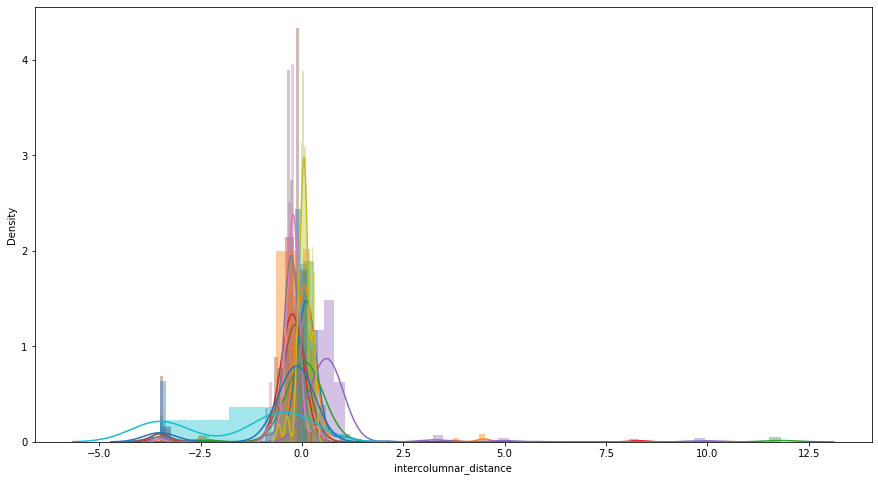

In [45]:
plt.figure(figsize=(15, 8))
for label in trainset['label'].unique():
    sns.distplot(trainset[trainset['label']==label]['intercolumnar_distance'])
plt.show()

In [46]:
trainset[trainset['intercolumnar_distance'] > 2.5]

intercolumnar_distance  upper_margin  lower_margin  exploitation  \
191                  3.265629     -0.251983      0.125378     -2.123860   
197                  4.524702     -0.134216      0.232070     -2.514351   
313                  3.722352      0.336855      0.175168     -2.701227   
735                  9.523960     -0.181323      0.068476     -2.809808   
742                  3.722352      0.336855      0.175168     -2.701227   
...                       ...           ...           ...           ...   
9664                 3.722352      0.336855      0.175168     -2.701227   
9754                 9.523960     -0.181323      0.068476     -2.809808   
9803                 9.943651     -0.220579     -0.048886     -0.675372   
9935                 4.462983     -0.181323      0.306755     -2.963951   
10423                4.969080     -0.385453      0.143160     -2.600732   

       row_number  modular_ratio  interlinear_spacing  peak_number label  
191      0.976743      -1.595254            -1.252090     0.812439     I  
197     -0.900198      -0.640182             0.220177    -0.840179     F  
313      0.261718      -0.557133             0.446679    -0.403638     F  
735     -2.777139      -2.674900            -2.913108    -3.085245     A  
742      0.261718       0.522513             0.295677    -1.245538     F  
...           ...            ...                  ...          ...   ...  
9664     0.261718       0.231839             0.220177    -0.154186     F  
9754    -2.777139      -0.806282             1.503691    -2.492797     A  
9803    -3.045274       3.719926             2.371950    -2.898156     I  
9935     0.261718      -0.017310             0.748682    -2.180982     F  
10423    0.976743      -0.764757            -0.232828    -1.183175     I  

[104 rows x 9 columns]

/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/sebastienyung/o

/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: Futur

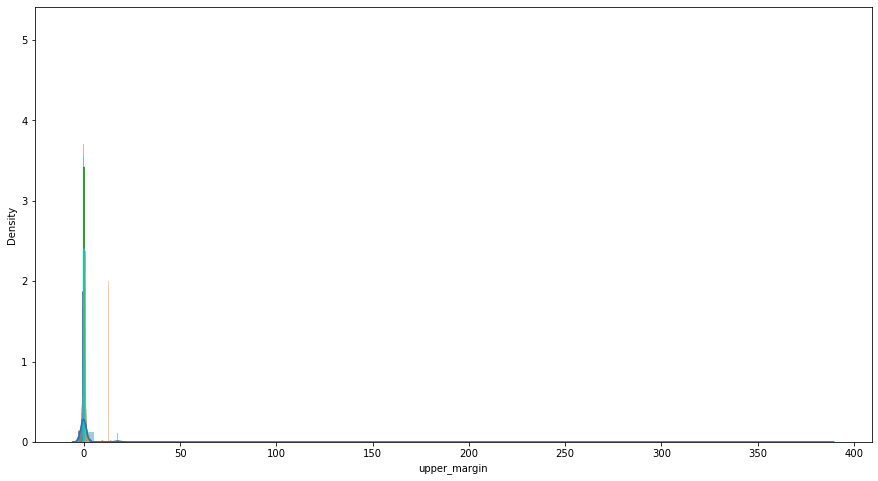

In [47]:
plt.figure(figsize=(15, 8))
for label in trainset['label'].unique():
    sns.distplot(trainset[trainset['label']==label]['upper_margin'])
plt.show()

In [48]:
trainset[trainset['upper_margin'] > 100]

intercolumnar_distance  upper_margin  lower_margin  exploitation  \
6619                     0.0         386.0          50.0      0.168104   

      row_number  modular_ratio  interlinear_spacing  peak_number label  
6619         0.0           53.0                 83.0         44.0     A

/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/sebastienyung/o

/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: Futur

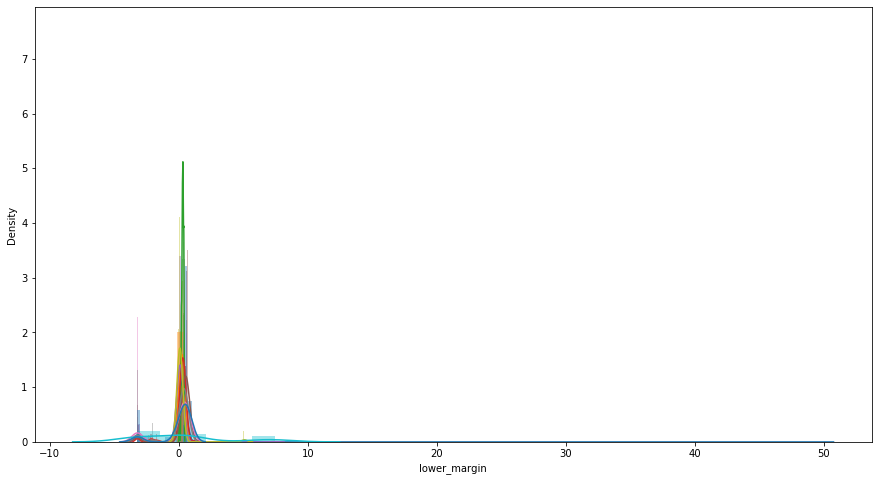

In [49]:
plt.figure(figsize=(15, 8))
for label in trainset['label'].unique():
    sns.distplot(trainset[trainset['label']==label]['lower_margin'])
plt.show()

In [50]:
trainset[trainset['lower_margin'] > 10]

intercolumnar_distance  upper_margin  lower_margin  exploitation  \
6619                     0.0         386.0          50.0      0.168104   

      row_number  modular_ratio  interlinear_spacing  peak_number label  
6619         0.0           53.0                 83.0         44.0     A

/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/sebastienyung/o

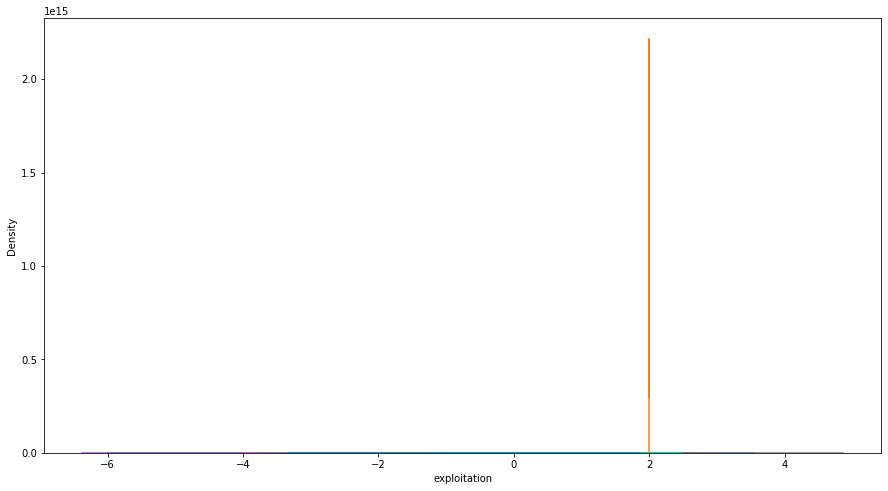

In [51]:
plt.figure(figsize=(15, 8))
for label in trainset['label'].unique():
    sns.distplot(trainset[trainset['label']==label]['exploitation'])
plt.show()

In [52]:
trainset[(trainset['exploitation'] > 2.3)]

intercolumnar_distance  upper_margin  lower_margin  exploitation  \
54                 -0.277055      0.038511      0.420560      3.987152   
438                 0.031541      0.007106     -0.315616      2.791392   
709                -0.277055      0.038511      0.420560      3.987152   
881                -0.277055      0.038511      0.420560      3.987152   
2763               -0.277055      0.038511      0.420560      3.987152   
2896               -3.498799      8.133080      6.381091      2.974359   
3069                0.031541      0.007106     -0.315616      2.791392   
4585               -0.277055      0.038511      0.420560      3.987152   
5325                0.031541      0.007106     -0.315616      2.791392   
5658               -0.277055      0.038511      0.420560      3.987152   
6180               -0.277055      0.038511      0.420560      3.987152   
6386               -0.277055      0.038511      0.420560      3.987152   
6480                0.031541      0.007106     -0.315616      2.791392   
6606               -0.277055      0.038511      0.420560      3.987152   
6926               -0.277055      0.038511      0.420560      3.987152   
7048               -0.277055      0.038511      0.420560      3.987152   
7395                0.031541      0.007106     -0.315616      2.791392   
7688               -0.277055      0.038511      0.420560      3.987152   
7719                0.031541      0.007106     -0.315616      2.791392   
8146                0.031541      0.007106     -0.315616      2.791392   
8400                0.031541      0.007106     -0.315616      2.791392   
9750               -0.277055      0.038511      0.420560      3.987152   
9981                0.031541      0.007106     -0.315616      2.791392   

      row_number  modular_ratio  interlinear_spacing  peak_number label  
54      0.172340      -0.141884            -3.177361     0.905984     X  
438    -0.542686       2.058932            -0.044076    -0.434820     A  
709     0.172340       1.269960             0.144676     0.188810     X  
881     0.172340       1.519109             0.748682     1.591976     X  
2763    0.172340       0.397939            -0.270579     1.498432     X  
2896   -4.922215      -1.968978             4.523724    -3.989507     A  
3069   -0.542686      -2.840999            -0.044076    -1.713260     A  
4585    0.172340       1.726734             0.257927     2.028517     X  
5325   -0.542686       0.024215            -0.044076    -2.866974     A  
5658    0.172340       1.809783            -2.346852     0.344717     X  
6180    0.172340       2.017408             0.522180     1.966154     X  
6386    0.172340       1.394535             0.446679     1.997335     X  
6480   -0.542686      -2.924049            -5.933141    -1.713260     A  
6606    0.172340       1.643684             0.635431     1.966154     X  
6926    0.172340       1.353010             0.106925     2.277968     X  
7048    0.172340       1.269960             0.748682     2.652146     X  
7395   -0.542686       0.356414             0.937434    -2.804611     A  
7688    0.172340       2.100457             0.333428     2.277968     X  
7719   -0.542686       1.477585             0.031425    -0.497183     A  
8146   -0.542686       0.314889             0.975185    -2.866974     A  
8400   -0.542686       1.934358            -0.119577    -0.310094     A  
9750    0.172340       1.560634             0.333428     0.282354     X  
9981   -0.542686      -1.304580            -2.950858    -2.212163     A

In [53]:
trainset[(trainset['exploitation'] < -2)]

intercolumnar_distance  upper_margin  lower_margin  exploitation  \
6                    0.389513     -0.220579     -3.210528     -2.624155   
11                  -3.498799     -0.566031      0.139604     -5.440122   
71                  -3.498799      0.486028      0.139604     -5.440122   
72                   0.315450      0.517433     -0.002652     -2.543473   
77                  -3.498799      0.203385      0.954020     -2.222565   
...                       ...           ...           ...           ...   
10355               -0.511588     -0.620989      0.491688     -2.053711   
10370                0.142636     -0.291239     -3.210528     -2.167812   
10378                0.315450      0.517433     -0.002652     -2.543473   
10382                0.327793     -0.142067      0.481018     -2.171392   
10423                4.969080     -0.385453      0.143160     -2.600732   

       row_number  modular_ratio  interlinear_spacing  peak_number label  
6        0.261718      -0.764757             0.484429    -0.372457     A  
11       0.976743      -0.847807            -1.176589     0.438262     I  
71      -0.006417       0.148790             0.635431    -2.430434     A  
72       0.261718      -1.055431             0.031425    -0.278912     F  
77      -4.922215      -1.802878            -3.290612    -2.492797     A  
...           ...            ...                  ...          ...   ...  
10355   -0.006417       1.311485            -3.026359    -3.490604     D  
10370    0.351096      -1.013906             0.106925    -0.247731     F  
10378    0.261718      -0.972381             0.144676    -0.746634     F  
10382    0.261718       0.190314             0.559930     0.750076     A  
10423    0.976743      -0.764757            -0.232828    -1.183175     I  

[396 rows x 9 columns]

/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/sebastienyung/o

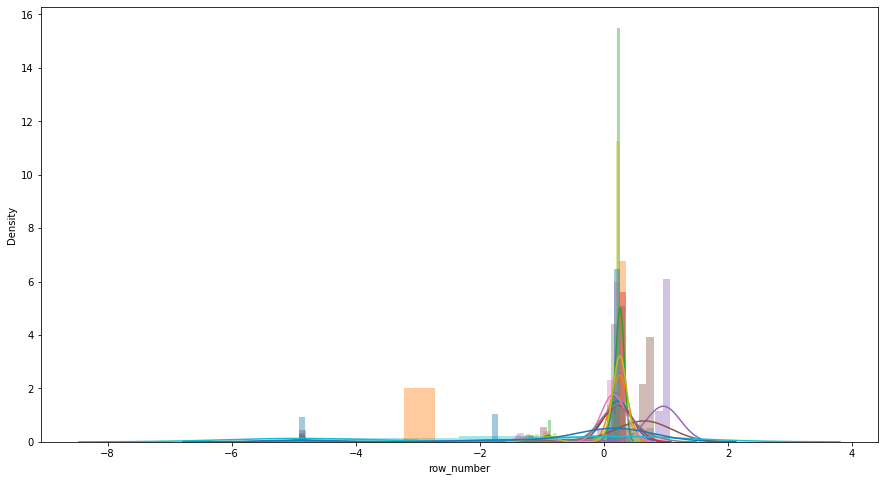

In [54]:
plt.figure(figsize=(15, 8))
for label in trainset['label'].unique():
    sns.distplot(trainset[trainset['label']==label]['row_number'])
plt.show()

In [55]:
trainset[(trainset['row_number'] < -5)]

Empty DataFrame
Columns: [intercolumnar_distance, upper_margin, lower_margin, exploitation, row_number, modular_ratio, interlinear_spacing, peak_number, label]
Index: []

/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/sebastienyung/o

/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sebastienyung/opt/anac

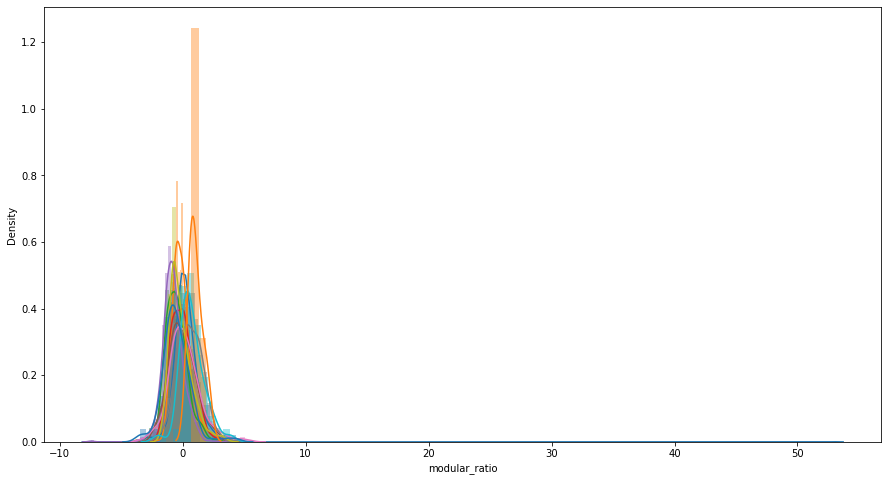

In [56]:
plt.figure(figsize=(15, 8))
for label in trainset['label'].unique():
    sns.distplot(trainset[trainset['label']==label]['modular_ratio'])
plt.show()

In [57]:
trainset[(trainset['row_number'] > 10)]

Empty DataFrame
Columns: [intercolumnar_distance, upper_margin, lower_margin, exploitation, row_number, modular_ratio, interlinear_spacing, peak_number, label]
Index: []

/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/sebastienyung/o

/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: Futur

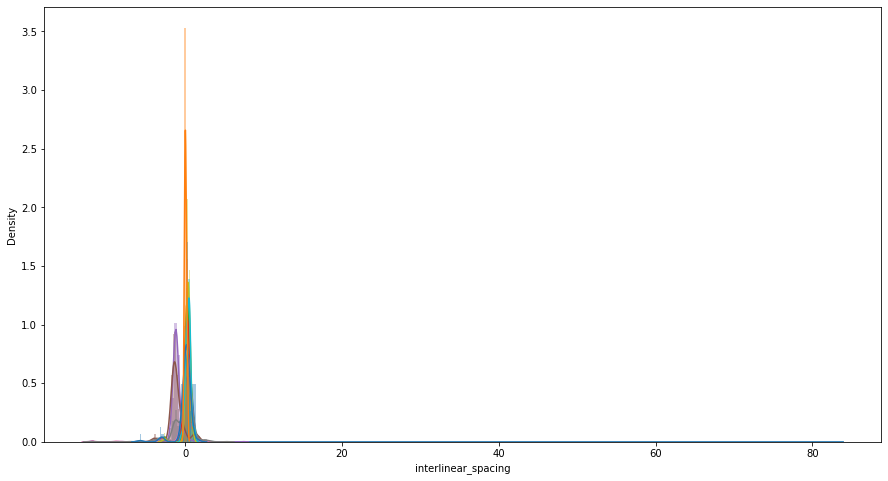

In [58]:
plt.figure(figsize=(15, 8))
for label in trainset['label'].unique():
    sns.distplot(trainset[trainset['label']==label]['interlinear_spacing'])
plt.show()

In [59]:
trainset[(trainset['interlinear_spacing'] > 20)]

intercolumnar_distance  upper_margin  lower_margin  exploitation  \
6619                     0.0         386.0          50.0      0.168104   

      row_number  modular_ratio  interlinear_spacing  peak_number label  
6619         0.0           53.0                 83.0         44.0     A

In [60]:
plt.figure(figsize=(15, 8))
for label in trainset['label'].unique():
    sns.distplot(trainset[trainset['label']==label]['weight'])
plt.show()

KeyError: 'weight'

<Figure size 1080x576 with 0 Axes>

In [ ]:
trainset[(trainset['weight'] > 5)]

/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/sebastienyung/o

/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/sebastienyung/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: Futur

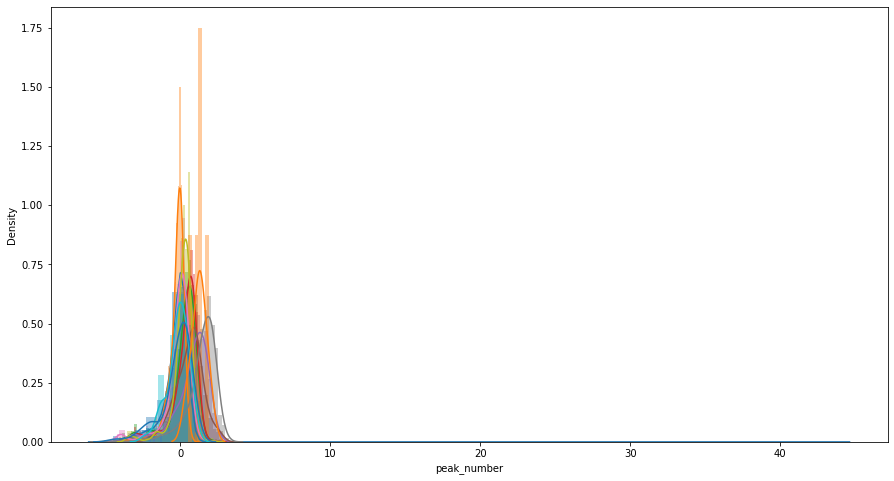

In [61]:
plt.figure(figsize=(15, 8))
for label in trainset['label'].unique():
    sns.distplot(trainset[trainset['label']==label]['peak_number'])
plt.show()

In [62]:
trainset[(trainset['peak_number'] > 10)]

intercolumnar_distance  upper_margin  lower_margin  exploitation  \
6619                     0.0         386.0          50.0      0.168104   

      row_number  modular_ratio  interlinear_spacing  peak_number label  
6619         0.0           53.0                 83.0         44.0     A

In [63]:
plt.figure(figsize=(15, 8))
for label in trainset['label'].unique():
    sns.distplot(trainset[trainset['label']==label]['modular_ratio/interlinear_spacing'])
plt.show()

KeyError: 'modular_ratio/interlinear_spacing'

<Figure size 1080x576 with 0 Axes>

In [64]:
plt.figure(figsize=(15, 8))
for label in trainset['label'].unique():
    sns.distplot(trainset[trainset['label']==label]['modular_ratio/interlinear_spacing'])
plt.show()

KeyError: 'modular_ratio/interlinear_spacing'

<Figure size 1080x576 with 0 Axes>

In [65]:
import joblib

In [66]:
filename = 'final_model.sav'
joblib.dump(model9, filename)

['final_model.sav']

In [67]:
pip install django

Note: you may need to restart the kernel to use updated packages.


In [68]:
import django

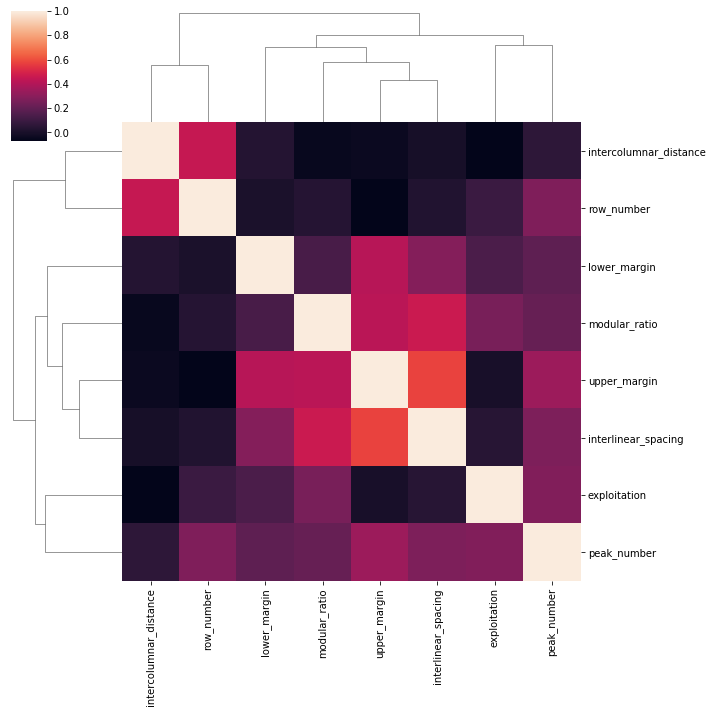

In [69]:
sns.clustermap(trainset.corr())

## Features selection

In [70]:
import random
import pandas as pd
random.seed(42)

trainset = pd.read_csv("avila-tr.txt",delimiter=',')
trainset.to_csv('avila-tr.csv')
testset = pd.read_csv("avila-ts.txt",delimiter=',')
testset.to_csv('avila-ts.csv')

trainset = pd.read_csv('avila-tr.csv', names=['intercolumnar_distance','upper_margin','lower_margin',
                                        'exploitation','row_number','modular_ratio','interlinear_spacing',
                                        'weight','peak_number','modular_ratio/interlinear_spacing','label'])
testset = pd.read_csv('avila-ts.csv', names=['intercolumnar_distance','upper_margin','lower_margin',
                                        'exploitation','row_number','modular_ratio','interlinear_spacing',
                                        'weight','peak_number','modular_ratio/interlinear_spacing','label'])

trainset.to_csv('avila-tr.csv')
testset.to_csv('avila-ts.csv')

df = pd.concat([trainset, testset], axis=0, ignore_index=True, sort=False)

df.reset_index(inplace=True, drop=True)

trainset = df[:trainset.shape[0]]
testset = df[trainset.shape[0]:]

X_train = trainset.drop('label', axis=1)
y_train = trainset['label']
X_test = testset.drop('label', axis=1)
y_test = testset['label']

X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((10430, 10), (10430,), (10437, 10), (10437,))

In [71]:
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.feature_selection import mutual_info_classif 

In [72]:
X_train.shape, y_train.shape

((10430, 10), (10430,))

In [73]:
f_classif(X_train, y_train)

(array([ 69.36415416,   6.46480319,  12.54638585, 143.4966501 ,
         81.99985336,  91.02632928,  95.6229215 ,  30.03858907,
        214.79469083,  63.52088942]),
 array([7.37511869e-151, 8.22972652e-011, 6.14425216e-024, 7.88522494e-309,
        1.66345550e-178, 4.48034117e-198, 5.54745993e-208, 3.78304949e-063,
        0.00000000e+000, 5.62240920e-138]))

In [74]:
X_train.columns

Index(['intercolumnar_distance', 'upper_margin', 'lower_margin',
       'exploitation', 'row_number', 'modular_ratio', 'interlinear_spacing',
       'weight', 'peak_number', 'modular_ratio/interlinear_spacing'],
      dtype='object')

In [75]:
selector = SelectKBest(mutual_info_classif, k=8)
selector.fit_transform(X_train, y_train)
X_train.columns[selector.get_support()==False]

Index(['weight', 'modular_ratio/interlinear_spacing'], dtype='object')

In [76]:
import seaborn as sns

In [77]:
trainset.head()

intercolumnar_distance  upper_margin  lower_margin  exploitation  \
0                0.266074     -0.165620      0.320980      0.483299   
1                0.130292      0.870736     -3.210528      0.062493   
2               -0.116585      0.069915      0.068476     -0.783147   
3                0.031541      0.297600     -3.210528     -0.583590   
4                0.229043      0.807926     -0.052442      0.082634   

   row_number  modular_ratio  interlinear_spacing    weight  peak_number  \
0    0.172340       0.273364             0.371178  0.929823     0.251173   
1    0.261718       1.436060             1.465940  0.636203     0.282354   
2    0.261718       0.439463            -0.081827 -0.888236    -0.123005   
3   -0.721442      -0.307984             0.710932  1.051693     0.594169   
4    0.261718       0.148790             0.635431  0.051062     0.032902   

   modular_ratio/interlinear_spacing label  
0                           0.159345     A  
1                           0.515587     A  
2                           0.582939     A  
3                          -0.533994     A  
4                          -0.086652     F

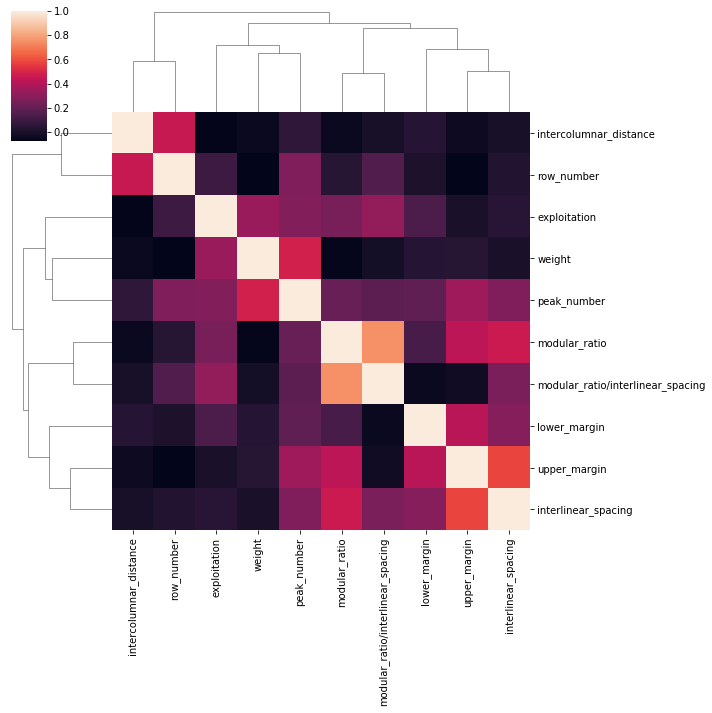

In [78]:
sns.clustermap(trainset.corr())

In [79]:
trainset = trainset.drop(['weight', 'modular_ratio/interlinear_spacing'], axis=1)
testset = testset.drop(['weight', 'modular_ratio/interlinear_spacing'], axis=1)
trainset


intercolumnar_distance  upper_margin  lower_margin  exploitation  \
0                    0.266074     -0.165620      0.320980      0.483299   
1                    0.130292      0.870736     -3.210528      0.062493   
2                   -0.116585      0.069915      0.068476     -0.783147   
3                    0.031541      0.297600     -3.210528     -0.583590   
4                    0.229043      0.807926     -0.052442      0.082634   
...                       ...           ...           ...           ...   
10425                0.080916      0.588093      0.015130      0.002250   
10426                0.253730     -0.338346      0.352988     -1.154243   
10427                0.229043     -0.000745      0.171611     -0.002793   
10428               -0.301743      0.352558      0.288973      1.638181   
10429               -0.104241     -1.037102      0.388552     -1.099311   

       row_number  modular_ratio  interlinear_spacing  peak_number label  
0        0.172340       0.273364             0.371178     0.251173     A  
1        0.261718       1.436060             1.465940     0.282354     A  
2        0.261718       0.439463            -0.081827    -0.123005     A  
3       -0.721442      -0.307984             0.710932     0.594169     A  
4        0.261718       0.148790             0.635431     0.032902     F  
...           ...            ...                  ...          ...   ...  
10425    0.261718      -0.557133             0.371178     0.282354     F  
10426    0.172340      -0.557133             0.257927     0.032902     F  
10427    0.261718       0.688613             0.295677    -0.590727     A  
10428    0.261718       0.688613             0.069175     0.625350     E  
10429    0.172340      -0.307984             0.786433     0.999528     X  

[10430 rows x 9 columns]

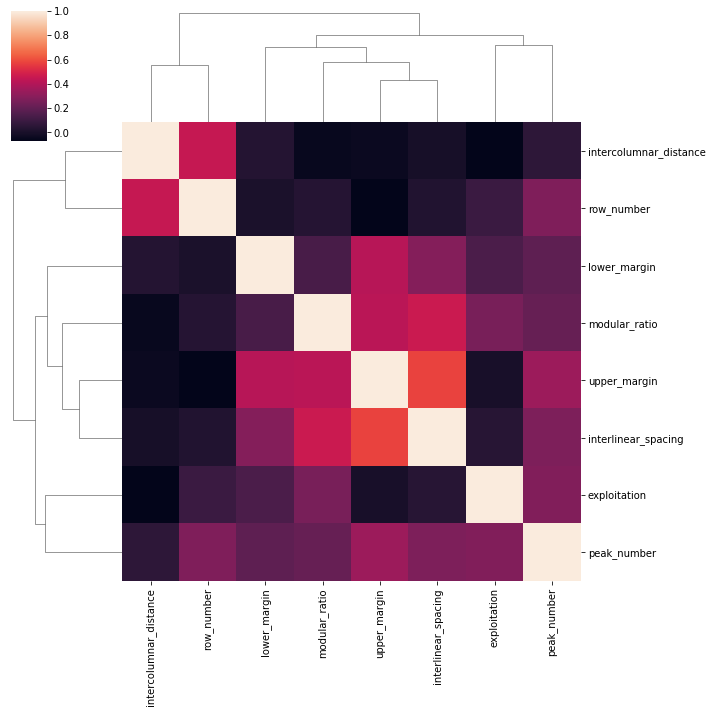

In [80]:
sns.clustermap(trainset.corr())

In [81]:
X_train = trainset.drop('label', axis=1)
y_train = trainset['label']
X_test = testset.drop('label', axis=1)
y_test = testset['label']

In [82]:
np.random.seed(42)
model9.fit(X_train, y_train)
predictions = model9.predict(X_test)
((y_test == predictions).sum()/len(y_test))*100
#99.86586183769283

99.86586183769283

In [83]:
#plt.figure(figsize=(15, 8))
#for label in trainset['label'].unique():
#    sns.distplot(trainset[trainset['label']==label]['upper_margin'])
#plt.show()

In [84]:
#trainset[trainset['upper_margin'] > 20]

In [85]:
#trainset_tmp = trainset.drop(index=trainset[trainset['upper_margin'] > 20].index, axis=0)

In [86]:
plt.figure(figsize=(15, 8))
for label in trainset_tmp['label'].unique():
    sns.distplot(trainset_tmp[trainset_tmp['label']==label]['lower_margin'])
plt.show()

NameError: name 'trainset_tmp' is not defined

<Figure size 1080x576 with 0 Axes>

In [87]:
trainset_tmp[trainset_tmp['lower_margin'] > 10]

NameError: name 'trainset_tmp' is not defined

In [88]:
plt.figure(figsize=(15, 8))
for label in trainset_tmp['label'].unique():
    sns.distplot(trainset_tmp[trainset_tmp['label']==label]['exploitation'])
plt.show()

NameError: name 'trainset_tmp' is not defined

<Figure size 1080x576 with 0 Axes>

In [89]:
trainset_tmp[(trainset_tmp['exploitation'] > 2.3)]

NameError: name 'trainset_tmp' is not defined

In [90]:
#trainset_tmp = trainset_tmp.drop(index=trainset_tmp[(trainset_tmp['exploitation'] > 2.3)].index, axis=0)

In [91]:
trainset_tmp[(trainset_tmp['exploitation'] < -3)]

NameError: name 'trainset_tmp' is not defined

In [92]:
#trainset_tmp = trainset_tmp.drop(index=trainset_tmp[(trainset_tmp['exploitation'] < -3)].index, axis=0)

In [93]:
plt.figure(figsize=(15, 8))
for label in trainset_tmp['label'].unique():
    sns.distplot(trainset_tmp[trainset_tmp['label']==label]['row_number'])
plt.show()

NameError: name 'trainset_tmp' is not defined

<Figure size 1080x576 with 0 Axes>

In [94]:
trainset_tmp[(trainset_tmp['row_number'] < -5)]

NameError: name 'trainset_tmp' is not defined

In [95]:
trainset_tmp[(trainset_tmp['row_number'] > 10)]

NameError: name 'trainset_tmp' is not defined

In [96]:
plt.figure(figsize=(15, 8))
for label in trainset_tmp['label'].unique():
    sns.distplot(trainset_tmp[trainset_tmp['label']==label]['modular_ratio'])

plt.show()

NameError: name 'trainset_tmp' is not defined

<Figure size 1080x576 with 0 Axes>

In [97]:
trainset_tmp[(trainset_tmp['modular_ratio'] < -6)]

NameError: name 'trainset_tmp' is not defined

In [98]:
#trainset_tmp = trainset_tmp.drop(index=trainset_tmp[(trainset_tmp['modular_ratio'] < -6)].index, axis=0)

In [99]:
plt.figure(figsize=(15, 8))
for label in trainset_tmp['label'].unique():
    sns.distplot(trainset_tmp[trainset_tmp['label']==label]['interlinear_spacing'])
plt.show()

NameError: name 'trainset_tmp' is not defined

<Figure size 1080x576 with 0 Axes>

In [100]:
trainset_tmp[(trainset_tmp['interlinear_spacing'] > 5)]

NameError: name 'trainset_tmp' is not defined

In [101]:
trainset_tmp = trainset_tmp.drop(index=trainset_tmp[(trainset_tmp['interlinear_spacing'] > 5)].index, axis=0)

NameError: name 'trainset_tmp' is not defined

In [102]:
trainset_tmp[(trainset_tmp['interlinear_spacing'] < -7)]

NameError: name 'trainset_tmp' is not defined

In [103]:
#trainset_tmp = trainset_tmp.drop(index=trainset_tmp[(trainset_tmp['interlinear_spacing'] < -7)].index, axis=0)

In [104]:
plt.figure(figsize=(15, 8))
for label in trainset_tmp['label'].unique():
    sns.distplot(trainset_tmp[trainset_tmp['label']==label]['peak_number'])
plt.show()

NameError: name 'trainset_tmp' is not defined

<Figure size 1080x576 with 0 Axes>

In [105]:
trainset_tmp[(trainset_tmp['peak_number'] > 10)]

NameError: name 'trainset_tmp' is not defined

In [106]:
X_train = trainset_tmp.drop('label', axis=1)
y_train = trainset_tmp['label']
X_test = testset.drop('label', axis=1)
y_test = testset['label']

NameError: name 'trainset_tmp' is not defined

In [107]:
import numpy as np

In [108]:
np.random.seed(42)
model9.fit(X_train, y_train)
predictions = model9.predict(X_test)
model9.score(X_test, y_test)*100
#99.86586183769283

99.86586183769283

## Voting classifier

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [110]:
vote_model1 = make_pipeline(PolynomialFeatures(degree=3), RandomForestClassifier(n_estimators=300, max_features='sqrt',
                                                                                 max_depth=15, criterion='entropy', 
                                                                                 bootstrap=False))
vote_model2 = DecisionTreeClassifier(random_state=0)
vote_model3 = make_pipeline(PolynomialFeatures(degree=5), KNeighborsClassifier(weights='distance', 
                                                                          n_neighbors=4, leaf_size=5, 
                                                                          algorithm='auto'))

vote_model4 = VotingClassifier([('Pipeline Random Forest', vote_model1),
                               ('Decision Tree', vote_model2),
                               ('Pipeline KNN', vote_model3)], voting='hard')

for model in (vote_model1, vote_model2, vote_model3, vote_model4):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))

Pipeline 0.9984669924307751
DecisionTreeClassifier 0.9751844399731724
Pipeline 0.7718693111047236
VotingClassifier 0.9879275653923542


## Bagging

In [111]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [112]:
bagging_model = BaggingClassifier(base_estimator=make_pipeline(PolynomialFeatures(degree=3), RandomForestClassifier(n_estimators=300, max_features='sqrt',
                                                                                 max_depth=15, criterion='entropy', 
                                                                                 bootstrap=False)),
                                 n_estimators=100)
bagging_model.fit(X_train,y_train)
bagging_model.score(X_test, y_test)

0.9978921145923157

## Boosting

In [113]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [114]:
boost_model = AdaBoostClassifier(n_estimators=50)
boost_model.fit(X_train, y_train)
boost_model.score(X_test, y_test)

0.47619047619047616

## Stacking

In [115]:
from sklearn.ensemble import StackingClassifier

In [116]:
vote_model4 = StackingClassifier([('Pipeline Random Forest', vote_model1),
                               ('Decision Tree', vote_model2),
                               ('Pipeline KNN', vote_model3)], final_estimator=RandomForestClassifier())


vote_model4.fit(X_train, y_train)
vote_model4.score(X_test, y_test)

0.9984669924307751